In [1]:
import matplotlib.pyplot as plt
import numpy as np

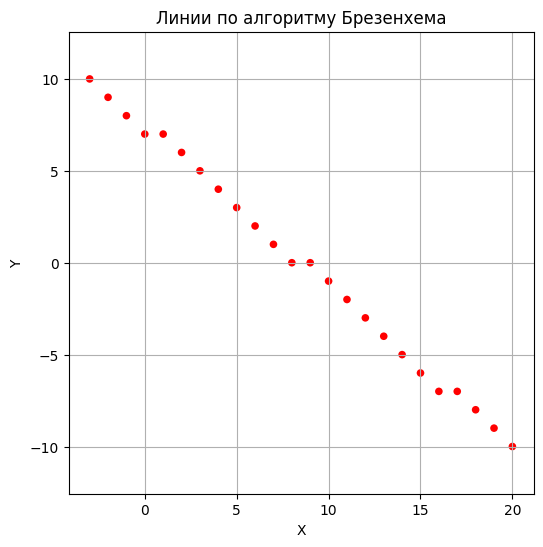

In [2]:
def myline(x1, y1, x2, y2, color):
    x1, y1, x2, y2 = int(round(x1)), int(round(y1)), int(round(x2)), int(round(y2))
    dx = abs(x2-x1)
    dy = abs(y2-y1)
    step_x = 1 if x1<x2 else -1
    step_y = 1 if y1<y2 else -1
    error = dx-dy
    x,y = x1,y1
    points_x = []
    points_y = []

    while True:
        points_x.append(x)
        points_y.append(y)
        if x==x2 and y==y2:
            break

        e2=2*error
        if e2 > -dy:
            error -= dy
            x +=step_x

        if e2 < dx:
            error += dx
            y+=step_y

    plt.scatter(points_x, points_y, color=color, s=30, edgecolors='none')


plt.figure(figsize=(6, 6))
myline(-3, 10, 20, -10, 'red')
plt.title("Линии по алгоритму Брезенхема")
plt.grid(True)
plt.axis('equal')  # чтобы масштаб по X и Y был одинаковым
plt.xlabel('X')
plt.ylabel('Y')       
plt.show()

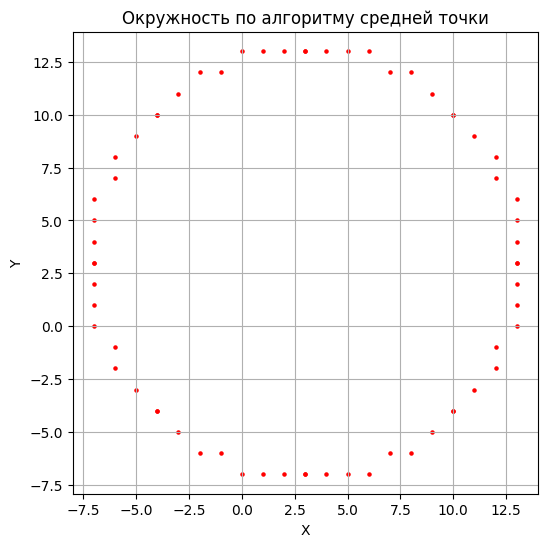

In [3]:
import matplotlib.pyplot as plt

def mycirc(x0, y0, radius, color):

    x = 0
    y = radius
    p = 5/4 - radius  

    points_x = []
    points_y = []

    def circle(x, y):
        points_x.extend([x + x0, -x + x0, x + x0, -x + x0,
                         y + x0, -y + x0, y + x0, -y + x0])
        points_y.extend([y + y0, y + y0, -y + y0, -y + y0,
                         x + y0, x + y0, -x + y0, -x + y0])

    while x <= y:
        circle(x, y)

        if p > 0:
            p = p + 2 * (x - y) + 5
            y -= 1
        else:
           
            p = p + 2 * x + 3
        x += 1

    plt.scatter(points_x, points_y, color=color, s=5)   


plt.figure(figsize=(6, 6))
mycirc(3, 3, 10, "red")
plt.title("Окружность по алгоритму средней точки")
plt.grid(True)
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

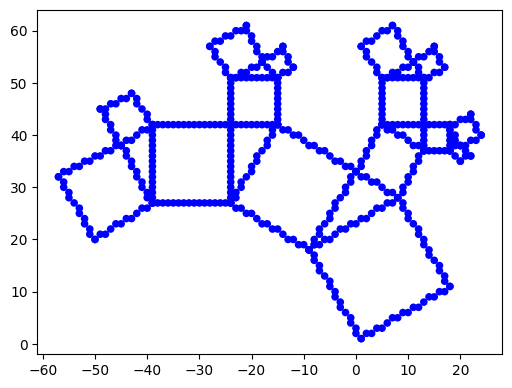

In [9]:
def pifagorovishtany(n,x0,y0,a,fi,alpha):
# n – глубина рекурсии построения фрактала
# x0, y0 – растровые координаты точки привязки «домика»
# a – длина основания «домика»
# fi – угол наклона основания «домика»
# alpha – угол наклона крыши «домика»
    if n==0:
        return
    
    #вершины
    ver1=np.array([x0,y0])
    ver2=ver1+np.array([np.cos(fi)*a,np.sin(fi)*a]) 
    ver3=ver1+np.array([-np.sin(fi)*a,np.cos(fi)*a])
    ver4=ver2+ver3-ver1

    # соединения вершины
    myline(ver1[0], ver1[1], ver2[0], ver2[1], "b")
    myline(ver1[0], ver1[1], ver3[0], ver3[1], "b")
    myline(ver2[0], ver2[1], ver4[0], ver4[1], "b")
    myline(ver3[0], ver3[1], ver4[0], ver4[1], "b")

    #стороны треугольника
    tr1=np.cos(alpha)*a
    tr2=np.sin(alpha)*a

    #вершина треугольника, которая учавствует в построеннии нового "домика"
    ver5=ver3+np.array([tr1*np.cos(fi+alpha),tr1*np.sin(fi+alpha)])

    
    pifagorovishtany(n-1,ver3[0],ver3[1],tr1,fi+alpha,alpha) #отрисовывание против часовой
    pifagorovishtany(n-1,ver5[0],ver5[1],tr2,fi+alpha-np.pi/2,alpha) # отрисовывание по часовой

fig = plt.figure(figsize=(6, 6))
ax=fig.add_subplot(1,1,1)
ax.set_aspect("equal")

pifagorovishtany(4, 1, 1, 20, np.radians(30), np.radians(30))
plt.show()

In [ ]:
# import turtle
# import math

# def myline(x1, y1, x2, y2, color="black", dot_size=5):
#      x1, y1, x2, y2 = int(round(x1)), int(round(y1)), int(round(x2)), int(round(y2))
    
#     dx = abs(x2 - x1)
#     dy = abs(y2 - y1)
#     step_x = 1 if x1 < x2 else -1
#     step_y = 1 if y1 < y2 else -1
#     error = dx - dy

#     x, y = x1, y1

#     # Настраиваем черепаху
#     t = turtle.Turtle()
#     t.speed(0)          
#     t.penup()          
#     t.hideturtle()      
#     t.color(color)

#     while True:
#         points = [
#             (x0 + x, y0 + y),
#             (x0 - x, y0 + y),
#             (x0 + x, y0 - y),
#             (x0 - x, y0 - y),
#             (x0 + y, y0 + x),
#             (x0 - y, y0 + x),
#             (x0 + y, y0 - x),
#             (x0 - y, y0 - x),
#         ]
#         t.goto(x, y)
#         t.dot(dot_size)  

#         if x == x2 and y == y2:
#             break

#         e2 = 2 * error
#         if e2 > -dy:
#             error -= dy
#             x += step_x
#         if e2 < dx:
#             error += dx
#             y += step_y


# if __name__ == "__main__":
    
#     screen = turtle.Screen()
#     screen.setup(width=600, height=600)
#     screen.setworldcoordinates(-50, -50, 50, 50)
#     screen.bgcolor("white")
#     screen.title("Линия по алгоритму Брезенхема (turtle)")

#     myline(-3, 10, 20, -10, color="red", dot_size=4)

#     turtle.done()

In [ ]:
# import turtle

# def mycirc(x0, y0, radius, color="black", dot_size=4):

#     radius = int(radius)
#     if radius <= 0:
#         return

#     x = 0
#     y = radius
#     p = 5/4 - radius

#     t = turtle.Turtle()
#     t.speed(0)          
#     t.penup()           
#     t.hideturtle()     
#     t.color(color)

#     def circle(x, y):
#         points = [
#             (x0 + x, y0 + y),
#             (x0 - x, y0 + y),
#             (x0 + x, y0 - y),
#             (x0 - x, y0 - y),
#             (x0 + y, y0 + x),
#             (x0 - y, y0 + x),
#             (x0 + y, y0 - x),
#             (x0 - y, y0 - x),
#         ]
#         for px, py in points:
#             t.goto(px, py)
#             t.dot(dot_size)

#     while x <= y:
#         circle(x, y)

#         if p > 0:
#             p = p + 2 * (x - y) + 5
#             y -= 1
#         else:
           
#             p = p + 2 * x + 3
#         x += 1

# if __name__ == "__main__":
#     # Настраиваем экран
#     screen = turtle.Screen()
#     screen.setup(width=600, height=600)
#     # Задаём систему координат: чтобы (0,0) был в центре, и масштаб был удобным
#     screen.setworldcoordinates(-20, -20, 20, 20)
#     screen.bgcolor("white")
#     screen.title("Окружность по алгоритму средней точки (turtle)")

#     
#     mycirc(3, 3, 10, color="red", dot_size=5)

#    
#     turtle.done()